# Modeling and Simulation in Python

Chapter 5

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [37]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Reading data

Pandas is a library that provides tools for reading and processing data.  `read_html` reads a web page from a file or the Internet and creates one `DataFrame` for each table on the page.

In [38]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.  The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence.

In [47]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
tables[2]

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1955,2782098943,NaN,2.761651e+09,2.769074e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,2835299673,NaN,2.811572e+09,2.822502e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957,2891349717,NaN,2.863043e+09,2.879934e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,2948137248,NaN,2.916030e+09,2.939254e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

In [60]:
table2 = tables[2]
table2[table2.columns[0]]

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
1955    2782098943
1956    2835299673
1957    2891349717
1958    2948137248
1959    3000716593
1960    3043001508
1961    3083966929
1962    3140093217
1963    3209827882
1964    3281201306
1965    3350425793
1966    3420677923
1967    3490333715
1968    3562313822
1969    3637159050
1970    3712697742
1971    3790326948
1972    3866568653
1973    3942096442
1974    4016608813
1975    4089083233
1976    4160185010
1977    4232084578
1978    4304105753
1979    4379013942
           ...    
1987    5027200492
1988    5114557167
1989    5201440110
1990    5288955934
1991    5371585922
1992    5456136278
1993    5538268316
1994    5618682132
1995    5699202985
1996    5779440593
1997    5857972543
1998    5935213248
1999    6012074922
2000    6088571383
2001    6165219247
2002    6242016348
2003    6318590956
2004    6395699509
2005    6473044732
2006    6551263534
2007    6629913759
2008   

`tail` selects the last five rows.

In [5]:
table2.tail()

Long column names are awkard to work with, but we can replace them with abbreviated names.

In [7]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

Here's what the DataFrame looks like now.  

In [8]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column, which is labeled `Year`, is special.  It is the **index** for this `DataFrame`, which means it contains the labels for the rows.

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

### Series

We can use dot notation to select a column from a `DataFrame`.  The result is a `Series`, which is like a `DataFrame` with a single column.

In [9]:
census = table2.census
census.head()

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
Name: census, dtype: int64

In [10]:
census.tail()

Year
2012    7013871313
2013    7092128094
2014    7169968185
2015    7247892788
2016    7325996709
Name: census, dtype: int64

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

From here on, we will work in units of billions.

In [11]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [12]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

Here's what these estimates look like.

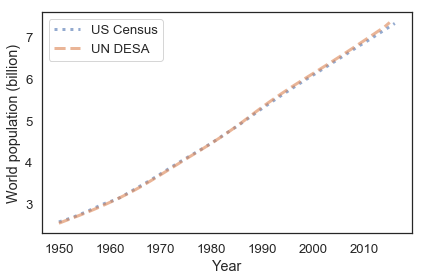

In [13]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')
# savefig('figs/chap03-fig01.pdf')

The following expression computes the elementwise differences between the two series, then divides through by the UN value to produce [relative errors](https://en.wikipedia.org/wiki/Approximation_error), then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [13]:
max(abs(census - un) / un) * 100

**Exercise:** Break down that expression into smaller steps and display the intermediate results, to make sure you understand how it works.

1.  Compute the elementwise differences, `census - un`
2.  Compute the absolute differences, `abs(census - un)`
3.  Compute the relative differences, `abs(census - un) / un`
4.  Compute the percent differences, `abs(census - un) / un * 100`


In [15]:
inter_diff = census - un;

In [17]:
inter_diff_abs = abs(inter_diff);

In [18]:
inter_diff_rel = inter_diff_abs/un;

In [19]:
perc_diff = 100 * inter_diff_rel

Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
1955    0.740425
1956    0.843928
1957    0.988701
1958    1.101054
1959    1.020766
1960    0.561750
1961    0.036871
1962    0.031146
1963    0.270201
1964    0.535045
1965    0.639908
1966    0.682939
1967    0.628856
1968    0.582745
1969    0.582126
1970    0.583151
1971    0.625807
1972    0.616597
1973    0.584666
1974    0.533223
1975    0.443692
1976    0.338849
1977    0.266959
1978    0.196499
1979    0.171246
          ...   
1987    0.359053
1988    0.460423
1989    0.546078
1990    0.598794
1991    0.690025
1992    0.705441
1993    0.727689
1994    0.749047
1995    0.742263
1996    0.714242
1997    0.690252
1998    0.670935
1999    0.651132
2000    0.638560
2001    0.627448
2002    0.618347
2003    0.619705
2004    0.621627
2005    0.630170
2006    0.636478
2007    0.647257
2008    0.660376
2009    0.680460
2010    0.832811
2011    0.885957
2012    0.935034
2013    0.977243
2014    1

`max` and `abs` are built-in functions provided by Python, but NumPy also provides version that are a little more general.  When you import `modsim`, you get the NumPy versions of these functions.

### Constant growth

We can select a value from a `Series` using bracket notation.  Here's the first element:

In [20]:
census[1950]

2.557628654

And the last value.

In [21]:
census[2016]

7.325996709

But rather than "hard code" those dates, we can get the first and last labels from the `Series`:

In [22]:
t_0 = get_first_label(census)

1950

In [23]:
t_end = get_last_label(census)

2016

In [24]:
elapsed_time = t_end - t_0

66

And we can get the first and last values:

In [25]:
p_0 = get_first_value(census)

2.557628654

In [26]:
p_end = get_last_value(census)

7.325996709

Then we can compute the average annual growth in billions of people per year.

In [27]:
total_growth = p_end - p_0

4.768368055

In [28]:
annual_growth = total_growth / elapsed_time

0.07224800083333333

### TimeSeries

Now let's create a `TimeSeries` to contain values generated by a linear growth model.

In [29]:
results = TimeSeries()

,values


Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [30]:
results[t_0] = census[t_0]
results

,values
1950,2.557629


After that, the population in the model grows by a constant amount each year.

In [31]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

Here's what the results looks like, compared to the actual data.

Saving figure to file figs/chap03-fig02.pdf


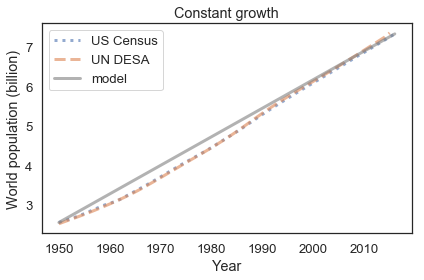

In [32]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')
savefig('figs/chap03-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

### Exercises

**Optional Exercise:**  Try fitting the model using data from 1970 to the present, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change.

2. Make sure your `TimeSeries` starts in 1950, even though the estimated annual growth is based on later data.

3. You might want to add a constant to the starting value to match the data better.

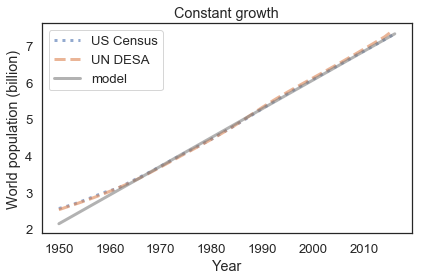

In [33]:
def model_census_data(data, start_year, end_year):
    avg_growth = (data[end_year] - data[start_year])/(end_year - start_year)
    results = TimeSeries()
    results[data.index[0]] = data[start_year] - avg_growth * (start_year - data.index[0])
    for i in linspace(data.index[1], end_year, (end_year - data.index[0])):
        results[i] = results[i-1] + avg_growth
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(results, color='gray', label='model')

    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Constant growth')
model_census_data(census, 1970, census.index[-1])

# Personal Work
The purpose of the following is to redo the models done above using purely base libraries (pandas and numpy, etc., as opposed to using modsim)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def lin_population_model(filename, table_choice_index, fit_data_index, fit_year, fit_data_label, \
                         comp_data_index, comp_data_label):
    """
    Takes in HTML table data of world population numbers and fits a linear population model to selected data.
    
    filename: path to the HTML file containing the table data
    table_choice_index: Select which table stored in the HTML file to use
    fit_data_index: Index of the data column within the table to fit the model to
    fit_year: The year to center the linear model around
    fit_data_label: Concise descriptor of the data column to which the model is fitted, for plotting
    comp_data_index: Index of data column to be used to compare model results and original data to
    comp_data_index: Concise descriptor of the comparison data column, for plotting
    
    Plots results of linear model
    Returns nothing
    
    """
    
    # Load the tables
    tables = read_html(filename, header=0, index_col=0, decimal='M')
    
    # Parse tables to find desired data
    data_table = tables[table_choice_index]
    data_column_to_fit = data_table.columns[fit_data_index]
    data_column_to_compare = data_table.columns[comp_data_index]
    data_to_fit = data_table[data_column_to_fit]
    data_to_compare = data_table[data_column_to_compare]
    
    # Create intermediate index variables
    end_year = data_to_fit.index[-1]
    start_year = data_to_fit.index[0]
    interval = end_year - start_year
    
    # Determine average annual population growth
    avg_growth = (data_to_fit[end_year] - data_to_fit[fit_year])/(end_year - fit_year)
    
    # Create blank Series object to hold results
    results = pd.Series(np.zeros((interval+1)), index=data_to_fit.index)
    # Create initial value for Series object, centered around year of fit
    results[start_year] = data_to_fit[fit_year] - avg_growth * (fit_year - start_year)
    # Increment population values per year, using avg_growth
    for i in linspace(start_year + 1, end_year, interval):
        results[i] = results[i-1] + avg_growth
    
    # Plot results using matplotlib
    plt.figure()
    plt.figure(figsize=[14,11]) # make the plot larger to more easily see results
    
    # Use the Series object's plot function to generate a plot via matplotlib
    data_to_fit.plot()
    data_to_compare.plot()
    results.plot()
    
    # Add labels, legend, and title
    plt.xlabel('Year') 
    plt.ylabel('World population (billion)')
    plt.title('Comparison of Linear World Population Growth Model to measured data')
    plt.legend([fit_data_label, comp_data_label, 'Linear Population Model'])

<Figure size 432x288 with 0 Axes>

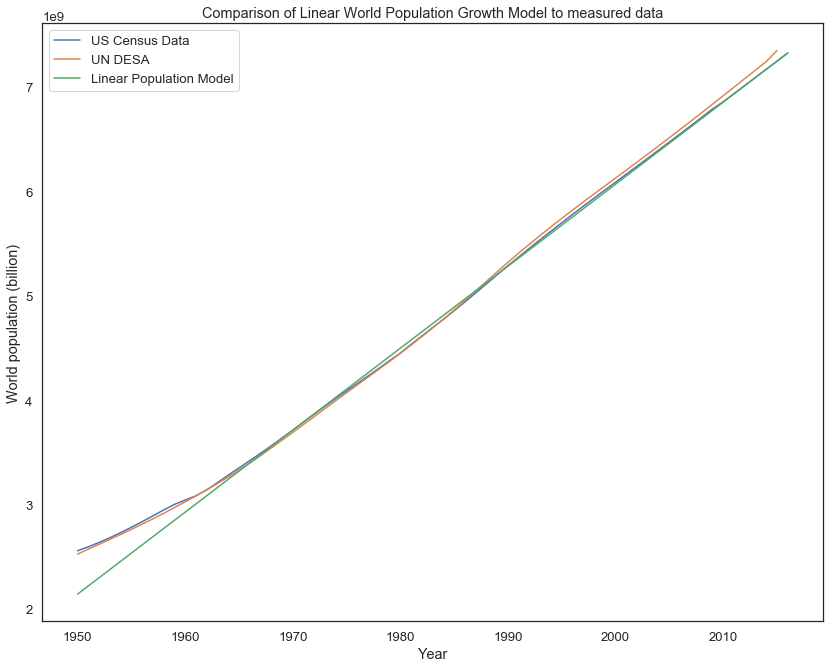

In [94]:
lin_population_model(filename='data/World_population_estimates.html', table_choice_index=2, fit_data_index=0, \
                     fit_year=1970, fit_data_label='US Census Data', comp_data_index=2, comp_data_label='UN DESA')